<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/newLossesLucia/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b newLossesLucia https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 1638 (delta 38), reused 0 (delta 0), pack-reused 1574
Receiving objects: 100% (1638/1638), 1.42 MiB | 1.55 MiB/s, done.
Resolving deltas: 100% (1046/1046), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
exemplars = [None]*100

test_indexes =  []
accs = []

[94 63 74 21 35 56 91 96 87 48]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 1., 0., 1., 0., 0., 0.])
At step  0  and at epoch =  0  the loss is =  2.662722587585449  and accuracy is =  0.2364
At step  0  and at epoch =  1  the loss is =  2.1507887840270996  and accuracy is =  0.3844
At step  0  and at epoch =  2  the loss is =  1.5419832468032837  and accuracy is =  0.4728
At step  0  and at epoch =  3  the loss is =  2.0918400287628174  and accuracy is =  0.544
At step  0  and at epoch =  4  the loss is =  1.0350502729415894  and accuracy is =  0.5314
At step  0  and at epoch =  5  the loss is =  0.9336247444152

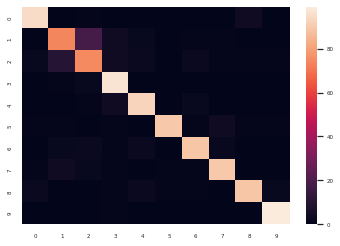

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0.,
        0., 0., 2., 0., 0., 0., 1., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 2., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 2., 0., 0.,
        0., 2., 1., 0., 2., 0., 2., 1., 0., 0.])
At step  10  and at epoch =  0  the loss is =  4.254764556884766  and accuracy is =  0.4035714285714286
At step  10  and at epoch =  1  the loss is =  3.441420078277588  and accuracy is =  0.5682857142857143
At step  10  and at epoch =  2  the loss is =  2.6234869956970215  and accuracy is =  0.6221428571428571
At step  10  and at epoch =  3  the loss is =  2.919022560119629  and accuracy is =  0.6375714285714286
At step  10  and at epoch =  4  the loss is =  2.7832350730895996  and a

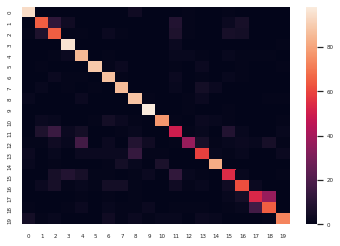

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 3., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
        0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 2., 0., 0.,
        1., 0., 3., 0., 0., 0., 2., 1., 2., 3., 0., 0., 1., 0., 2., 1., 0., 0.,
        0., 0., 3., 1., 2., 0., 0., 0., 2., 0., 0., 0., 1., 0., 0., 3., 0., 1.,
        0., 3., 2., 0., 3., 0., 3., 2., 0., 1.])
At step  20  and at epoch =  0  the loss is =  3.0957841873168945  and accuracy is =  0.3617142857142857
At step  20  and at epoch =  1  the loss is =  2.6024110317230225  and accuracy is =  0.5654285714285714
At step  20  and at epoch =  2  the loss is =  2.2367677688598633  and accuracy is =  0.6144285714285714
At step  20  and at epoch =  3  the loss is =  2.1959242820739746  and accuracy is =  0.6424285714285715
At step  20  and at epoch =  4  the lo

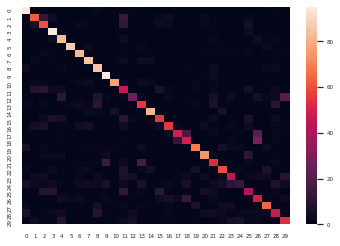

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 4., 3., 2., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
        0., 3., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0., 4., 1., 0., 3., 0., 0.,
        2., 0., 4., 0., 1., 0., 3., 2., 3., 4., 0., 0., 2., 0., 3., 2., 1., 0.,
        0., 1., 4., 2., 3., 1., 1., 0., 3., 0., 0., 0., 2., 1., 0., 4., 0., 2.,
        0., 4., 3., 0., 4., 0., 4., 3., 1., 2.])
At step  30  and at epoch =  0  the loss is =  2.2316746711730957  and accuracy is =  0.4035663338088445
At step  30  and at epoch =  1  the loss is =  2.0160131454467773  and accuracy is =  0.6329529243937233
At step  30  and at epoch =  2  the loss is =  1.7229862213134766  and accuracy is =  0.6656205420827389
At step  30  and at epoch =  3  the loss is =  1.543528437614441  and accuracy is =  0.68188302425107
At step  30

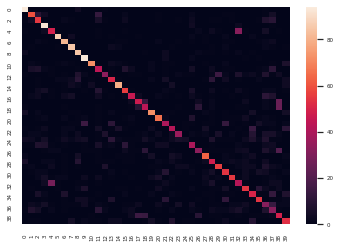

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49 65 88 36 93 45 10 90 17
 32 59]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 5., 4., 3., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 5.,
        1., 4., 0., 3., 0., 2., 0., 0., 0., 1., 0., 0., 5., 2., 0., 4., 0., 0.,
        3., 0., 5., 0., 2., 1., 4., 3., 4., 5., 0., 1., 3., 0., 4., 3., 2., 0.,
        0., 2., 5., 3., 4., 2., 2., 0., 4., 0., 0., 0., 3., 2., 0., 5., 1., 3.,
        1., 5., 4., 1., 5., 0., 5., 4., 2., 3.])
At step  40  and at epoch =  0  the loss is =  2.2229347229003906  and accuracy is =  0.37342857142857144
At step  40  and at epoch =  1  the loss is =  1.8805553913116455  and accuracy is =  0.5508571428571428
At step  40  and at epoch =  2  the loss is =  1.775254249572754  and accuracy is =  0.5842857142857143
At step  40  and at epoch =  3  the loss is =  1.495090365409851  and accuracy is 

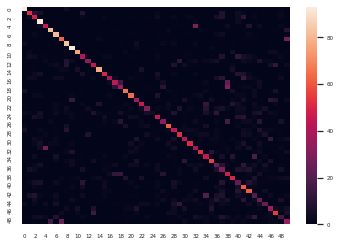

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49 65 88 36 93 45 10 90 17
 32 59 83 43 53 11 86 19 38 30 40 50]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 2.,
        0., 1., 0., 6., 5., 4., 3., 0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 6.,
        2., 5., 1., 4., 1., 3., 0., 1., 0., 2., 0., 0., 6., 3., 1., 5., 0., 1.,
        4., 0., 6., 0., 3., 2., 5., 4., 5., 6., 0., 2., 4., 0., 5., 4., 3., 0.,
        0., 3., 6., 4., 5., 3., 3., 0., 5., 0., 0., 1., 4., 3., 1., 6., 2., 4.,
        2., 6., 5., 2., 6., 0., 6., 5., 3., 4.])
At step  50  and at epoch =  0  the loss is =  2.2993111610412598  and accuracy is =  0.3954285714285714
At step  50  and at epoch =  1  the loss is =  1.9184281826019287  and accuracy is =  0.6034285714285714
At step  50  and at epoch =  2  the loss is =  1.511717677116394  and accuracy is =  0.6304285714285714
At step  50  and at epoch =  3  the loss is =  1.5437

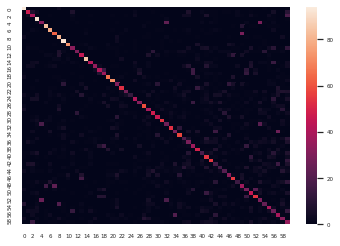

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49 65 88 36 93 45 10 90 17
 32 59 83 43 53 11 86 19 38 30 40 50 57 81 12 95 25 47 34 52 44 72]
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 2., 1., 0., 0., 0., 0., 3.,
        0., 2., 0., 7., 6., 5., 4., 1., 0., 0., 0., 0., 2., 0., 3., 0., 1., 7.,
        3., 6., 2., 5., 2., 4., 0., 2., 1., 3., 0., 1., 7., 4., 2., 6., 1., 2.,
        5., 0., 7., 1., 4., 3., 6., 5., 6., 7., 0., 3., 5., 0., 6., 5., 4., 0.,
        1., 4., 7., 5., 6., 4., 4., 0., 6., 1., 0., 2., 5., 4., 2., 7., 3., 5.,
        3., 7., 6., 3., 7., 1., 7., 6., 4., 5.])
At step  60  and at epoch =  0  the loss is =  2.1911280155181885  and accuracy is =  0.41489971346704874
At step  60  and at epoch =  1  the loss is =  1.4856343269348145  and accuracy is =  0.6108882521489971
At step  60  and at epoch =  2  the loss is =  1.4954543113708496  and accuracy is =  0.6467048710601719
At step  60  and at e

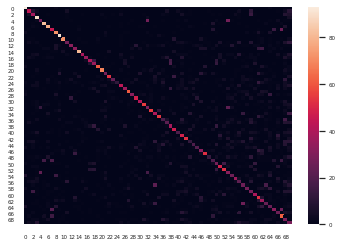

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49 65 88 36 93 45 10 90 17
 32 59 83 43 53 11 86 19 38 30 40 50 57 81 12 95 25 47 34 52 44 72 46 79
 20 28  5 71  8 18 33 15]
tensor([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 4., 3., 2., 0., 0., 1., 0., 4.,
        1., 3., 1., 8., 7., 6., 5., 2., 0., 0., 1., 0., 3., 0., 4., 1., 2., 8.,
        4., 7., 3., 6., 3., 5., 0., 3., 2., 4., 1., 2., 8., 5., 3., 7., 2., 3.,
        6., 0., 8., 2., 5., 4., 7., 6., 7., 8., 0., 4., 6., 0., 7., 6., 5., 1.,
        2., 5., 8., 6., 7., 5., 5., 1., 7., 2., 0., 3., 6., 5., 3., 8., 4., 6.,
        4., 8., 7., 4., 8., 2., 8., 7., 5., 6.])
At step  70  and at epoch =  0  the loss is =  2.0977439880371094  and accuracy is =  0.414651493598862
At step  70  and at epoch =  1  the loss is =  1.6189249753952026  and accuracy is =  0.6391180654338549
At step  70  and at epoch =  2  the loss is =  1.88278329372406  and accuracy is =  0.68406827880

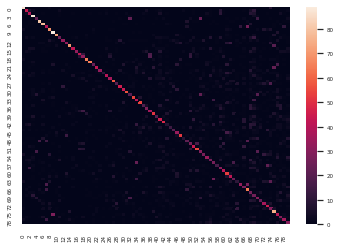

[94 63 74 21 35 56 91 96 87 48 68 80 22 37 60 97 51 62 92 76 75 89 23 99
 39 66 54 69 84 61 85 24 98 41 73 58 78 77 70 49 65 88 36 93 45 10 90 17
 32 59 83 43 53 11 86 19 38 30 40 50 57 81 12 95 25 47 34 52 44 72 46 79
 20 28  5 71  8 18 33 15 55 29 64 31 67  7 13 14 42  6]
tensor([0., 0., 0., 0., 0., 2., 1., 1., 2., 0., 5., 4., 3., 1., 1., 2., 0., 5.,
        2., 4., 2., 9., 8., 7., 6., 3., 0., 0., 2., 1., 4., 1., 5., 2., 3., 9.,
        5., 8., 4., 7., 4., 6., 1., 4., 3., 5., 2., 3., 9., 6., 4., 8., 3., 4.,
        7., 1., 9., 3., 6., 5., 8., 7., 8., 9., 1., 5., 7., 1., 8., 7., 6., 2.,
        3., 6., 9., 7., 8., 6., 6., 2., 8., 3., 0., 4., 7., 6., 4., 9., 5., 7.,
        5., 9., 8., 5., 9., 3., 9., 8., 6., 7.])
At step  80  and at epoch =  0  the loss is =  2.247159957885742  and accuracy is =  0.39185714285714285
At step  80  and at epoch =  1  the loss is =  1.9292023181915283  and accuracy is =  0.5871428571428572
At step  80  and at epoch =  2  the loss is =  1.7818049192428589 

In [ ]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer, randomS = True)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()